In [1]:
# Data preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('../data/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Feature Selection

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

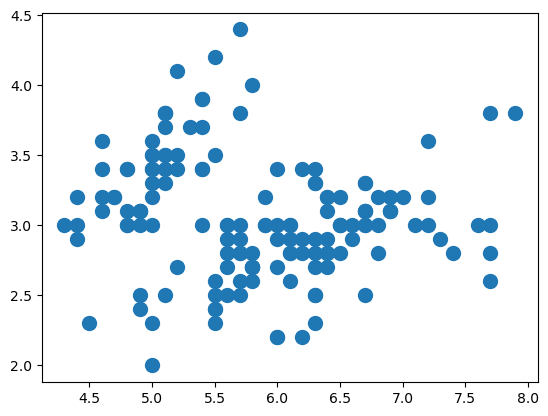

In [3]:
# Plot Data
# Because the data is 4 dimensions, we will try it
# cluster plot based on Sepal Length and Sepal Width only

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [4]:
# Create KMeans Model
# This time we try using k=2 - let's assume we don't know how many labels there are 3 :)

from sklearn.cluster import KMeans

# Initiate the KMeans object
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict models
y_kmeans = cl_kmeans.fit_predict(X)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


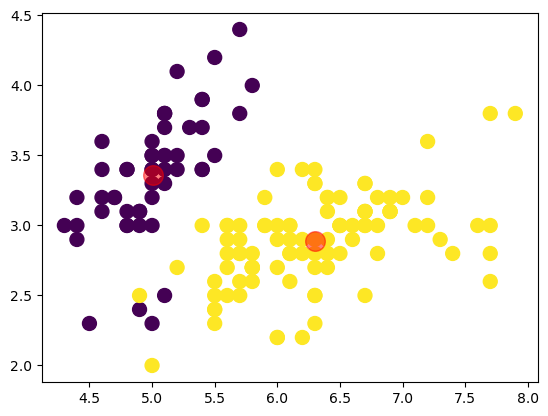

In [5]:
# Plot cluster results based on Sepal Length and Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Centroid plot
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [6]:
# Check SSE Value
print(f'SSE Value: {cl_kmeans.inertia_}')

SSE Value: 152.36870647733906


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

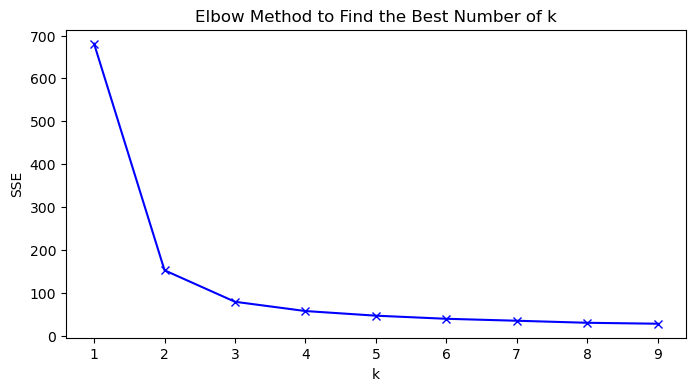

In [7]:
# Implementation of the Elbow Method

# List of SSE values
sse = []

# Find the best k from 1-10
K = range(1,10)

# Check the SSE value every k
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)
  sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find the Best Number of k")
plt.show()

In [8]:
# Check the SSE value every k
for idx, sse_val in enumerate(sse, start=1):
     print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244
k=2; SSE=152.36870647733906
k=3; SSE=78.9450658259773
k=4; SSE=57.34492380952381
k=5; SSE=46.535582051282056
k=6; SSE=39.27787900008488
k=7; SSE=34.721892109500814
k=8; SSE=29.955568877177576
k=9; SSE=27.766706937799043
